In [980]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [981]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
from matplotlib.transforms import Affine2D
pd.set_option("display.max_columns",None)

In [982]:
df=pd.read_csv("DrugAddictioninBangladesh_Smoted.csv")
df.head()

,Age,Gender,Education,Live with,Motive about drug,Spend most time,Failure in life,Mental/emotional problem,Suicidal thoughts,Family relationship,Financials of family,Addicted person in family,Withdrawal symptoms,Satisfied with workplace,Case in court,Living with drug user,Smoking,Ever taken drug,Friends influence,If chance given to taste drugs,Easy to control use of drug,Class
0,2.0,1.0,4.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2
1,2.0,1.0,3.0,1.0,3.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,3.0,1.0,3
2,1.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2
3,2.0,1.0,4.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2
4,2.0,1.0,4.0,1.0,2.0,3.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,4


In [983]:

df.iloc[0]

Age                               2.0
Gender                            1.0
Education                         4.0
Live with                         2.0
Motive about drug                 1.0
Spend most time                   3.0
Failure in life                   1.0
Mental/emotional problem          1.0
Suicidal thoughts                 1.0
Family relationship               1.0
Financials of family              3.0
Addicted person in family         2.0
Withdrawal symptoms               2.0
Satisfied with workplace          2.0
Case in court                     2.0
Living with drug user             1.0
Smoking                           1.0
Ever taken drug                   1.0
Friends influence                 1.0
If chance given to taste drugs    1.0
Easy to control use of drug       1.0
Class                             2.0
Name: 0, dtype: float64

Age 1 = 'between 15 to 22 years', 2 = 'between 22 to 35 years', 3 = 'between 35 to 48', 4 = 'above 48'.
Gender 1 = Male, 2 = Female.
Education = 


In [984]:
df.tail()

,Age,Gender,Education,Live with,Motive about drug,Spend most time,Failure in life,Mental/emotional problem,Suicidal thoughts,Family relationship,Financials of family,Addicted person in family,Withdrawal symptoms,Satisfied with workplace,Case in court,Living with drug user,Smoking,Ever taken drug,Friends influence,If chance given to taste drugs,Easy to control use of drug,Class
435,2.000000,1.000000,4.0,2.000000,2.00000,2.0,2.0,4.934642,2.000000,1.00000,2.0,2.000000,1.967321,1.00000,2.0,1.032679,1.000000,1.000000,1.967321,1.0,1.000000,3
436,1.000000,1.400013,3.0,1.400013,2.00000,2.0,2.0,1.000000,1.400013,2.00000,2.0,1.599987,1.599987,1.00000,2.0,1.000000,1.400013,1.000000,1.000000,1.0,1.400013,3
437,2.969459,2.000000,4.0,1.000000,2.00000,2.0,1.0,2.000000,1.969459,2.00000,3.0,1.000000,1.969459,1.00000,1.0,1.000000,2.000000,1.969459,1.000000,2.0,1.000000,3
438,2.140395,2.000000,4.0,1.000000,2.00000,2.0,1.0,2.000000,1.140395,2.00000,3.0,1.000000,1.140395,1.00000,1.0,1.000000,2.000000,1.140395,1.000000,2.0,1.000000,3
439,1.439780,1.000000,4.0,1.439780,2.43978,2.0,2.0,1.000000,1.000000,1.56022,3.0,2.560220,1.000000,1.56022,2.0,1.000000,1.000000,1.000000,2.000000,1.0,1.000000,3


In [985]:
df.shape

(440, 22)

In [986]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             440 non-null    float64
 1   Gender                          440 non-null    float64
 2   Education                       440 non-null    float64
 3   Live with                       440 non-null    float64
 4   Motive about drug               440 non-null    float64
 5   Spend most time                 440 non-null    float64
 6   Failure in life                 440 non-null    float64
 7   Mental/emotional problem        440 non-null    float64
 8   Suicidal thoughts               440 non-null    float64
 9   Family relationship             440 non-null    float64
 10  Financials of family            440 non-null    float64
 11  Addicted person in family       440 non-null    float64
 12  Withdrawal symptoms             440 

In [987]:
col = df.columns
for i in col:
    df[i] = (df[i].values).astype(int)

In [988]:
for i in col:
    print(i,df[i].unique())

Age [2 1 3 4]
Gender [1 2]
Education [4 3 5 1 2]
Live with [2 1]
Motive about drug [1 3 2]
Spend most time [3 2 1]
Failure in life [1 2]
Mental/emotional problem [1 2 3 5 4]
Suicidal thoughts [1 2]
Family relationship [1 2 3]
Financials of family [3 2 4 1]
Addicted person in family [2 3 1]
Withdrawal symptoms [2 1]
Satisfied with workplace [2 1]
Case in court [2 1]
Living with drug user [1 2 3]
Smoking [1 2 3]
Ever taken drug [1 2]
Friends influence [1 2]
If chance given to taste drugs [1 3 2]
Easy to control use of drug [1 2]
Class [2 3 4 1]


In [989]:
df.groupby(df['Class']).size()

Class
1    110
2    110
3    110
4    110
dtype: int64

In [990]:
df.describe()

,Age,Gender,Education,Live with,Motive about drug,Spend most time,Failure in life,Mental/emotional problem,Suicidal thoughts,Family relationship,Financials of family,Addicted person in family,Withdrawal symptoms,Satisfied with workplace,Case in court,Living with drug user,Smoking,Ever taken drug,Friends influence,If chance given to taste drugs,Easy to control use of drug,Class
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.790909,1.220455,3.595455,1.286364,2.159091,1.911364,1.347727,2.025000,1.536364,1.515909,2.400000,1.838636,1.381818,1.327273,1.768182,1.475000,1.522727,1.284091,1.418182,1.584091,1.181818,2.500000
std,0.605148,0.415025,0.775465,0.452576,0.562422,0.508567,0.476791,1.173672,0.499244,0.618413,0.887268,0.508567,0.486385,0.469752,0.422474,0.551917,0.760309,0.451494,0.493822,0.731474,0.386134,1.119307
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,3.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.750000
50%,2.000000,1.000000,4.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.500000
75%,2.000000,1.000000,4.000000,2.000000,2.250000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.250000
max,4.000000,2.000000,5.000000,2.000000,3.000000,3.000000,2.000000,5.000000,2.000000,3.000000,4.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,4.000000


In [991]:
df.isnull().sum()

Age                               0
Gender                            0
Education                         0
Live with                         0
Motive about drug                 0
Spend most time                   0
Failure in life                   0
Mental/emotional problem          0
Suicidal thoughts                 0
Family relationship               0
Financials of family              0
Addicted person in family         0
Withdrawal symptoms               0
Satisfied with workplace          0
Case in court                     0
Living with drug user             0
Smoking                           0
Ever taken drug                   0
Friends influence                 0
If chance given to taste drugs    0
Easy to control use of drug       0
Class                             0
dtype: int64

# Exploratory Data Analysis

In [992]:
def lowerupper(col):
    q1=np.quantile(col,.25)
    q3=np.quantile(col,.75)
    inter=q3-q1
    lowerbound=q1-(inter*1.5)
    upperbound=q3+(inter*1.5)
    outlier=[]
    for x in col:
        if((x>upperbound)or(x<lowerbound)):
            outlier.append(x)
    return outlier

In [993]:
col=df.columns
print(col)

Index(['Age', 'Gender', 'Education', 'Live with', 'Motive about drug',
       'Spend most time', 'Failure in life', 'Mental/emotional problem',
       'Suicidal thoughts', 'Family relationship', 'Financials of family',
       'Addicted person in family', 'Withdrawal symptoms',
       'Satisfied with workplace', 'Case in court', 'Living with drug user',
       'Smoking', 'Ever taken drug', 'Friends influence',
       'If chance given to taste drugs', 'Easy to control use of drug',
       'Class'],
      dtype='object')


In [994]:
for i in col:
    outlier=lowerupper(df[i].values)
    print(len(outlier),"outliers are present in",i)

1 outliers are present in Age
97 outliers are present in Gender
7 outliers are present in Education
0 outliers are present in Live with
150 outliers are present in Motive about drug
117 outliers are present in Spend most time
0 outliers are present in Failure in life
45 outliers are present in Mental/emotional problem
0 outliers are present in Suicidal thoughts
0 outliers are present in Family relationship
0 outliers are present in Financials of family
125 outliers are present in Addicted person in family
0 outliers are present in Withdrawal symptoms
0 outliers are present in Satisfied with workplace
102 outliers are present in Case in court
0 outliers are present in Living with drug user
0 outliers are present in Smoking
0 outliers are present in Ever taken drug
0 outliers are present in Friends influence
0 outliers are present in If chance given to taste drugs
80 outliers are present in Easy to control use of drug
0 outliers are present in Class


In [995]:
def lowerupper(col):
    q1=np.quantile(col,.25)
    q3=np.quantile(col,.75)
    inter=q3-q1
    lowerbound=q1-(inter*1.5)
    upperbound=q3+(inter*1.5)
    return lowerbound,upperbound

In [996]:
# lb,ub=lowerupper(df["Age"])
# df["Age"]=np.where(df["Age"]<lb,lb,df["Age"])
# df["Age"]=np.where(df["Age"]>ub,ub,df["Age"])

# #lb,ub=lowerupper(df["Gender"])
# #df["Gender"]=np.where(df["Gender"]<lb,lb,df["Gender"])
# #df["Gender"]=np.where(df["Gender"]>ub,ub,df["Gender"])

# lb,ub=lowerupper(df["Education"])
# df["Education"]=np.where(df["Education"]<lb,lb,df["Education"])
# df["Education"]=np.where(df["Education"]>ub,ub,df["Education"])

# lb,ub=lowerupper(df["Spend most time"])
# df["Spend most time"]=np.where(df["Spend most time"]<lb,lb,df["Spend most time"])
# df["Spend most time"]=np.where(df["Spend most time"]>ub,ub,df["Spend most time"])

# lb,ub=lowerupper(df["Addicted person in family"])
# df["Addicted person in family"]=np.where(df["Addicted person in family"]<lb,lb,df["Addicted person in family"])
# df["Addicted person in family"]=np.where(df["Addicted person in family"]>ub,ub,df["Addicted person in family"])

# lb,ub=lowerupper(df["Case in court"])
# df["Case in court"]=np.where(df["Case in court"]<lb,lb,df["Case in court"])
# df["Case in court"]=np.where(df["Case in court"]>ub,ub,df["Case in court"])

In [997]:
# plt.subplot(1,3,1)
# plt.subplots_adjust(left=0,right=2,bottom=1,top=2,wspace=0.2,hspace=0.4)
# plt.title("Age")
# plt.boxplot(df["Age"])

# plt.subplot(1,3,2)
# plt.title("Education")
# plt.boxplot(df["Education"])

# plt.subplot(1,3,3)
# plt.title("Spend most time")
# plt.boxplot(df["Spend most time"])

In [998]:
# plt.subplot(1,2,1)
# plt.subplots_adjust(left=0,right=2,bottom=1,top=2,wspace=0.2,hspace=0.4)
# plt.title("Addicted person in family")
# plt.boxplot(df["Addicted person in family"])

# plt.subplot(1,2,2)
# plt.title("Case in court")
# plt.boxplot(df["Case in court"])

([<matplotlib.patches.Wedge at 0x274fc6d0ec8>,
 [Text(-0.6840828629775153, 0.8614120016464167, '2'),
  Text(0.6840827823263004, -0.8614120656948727, '1')])

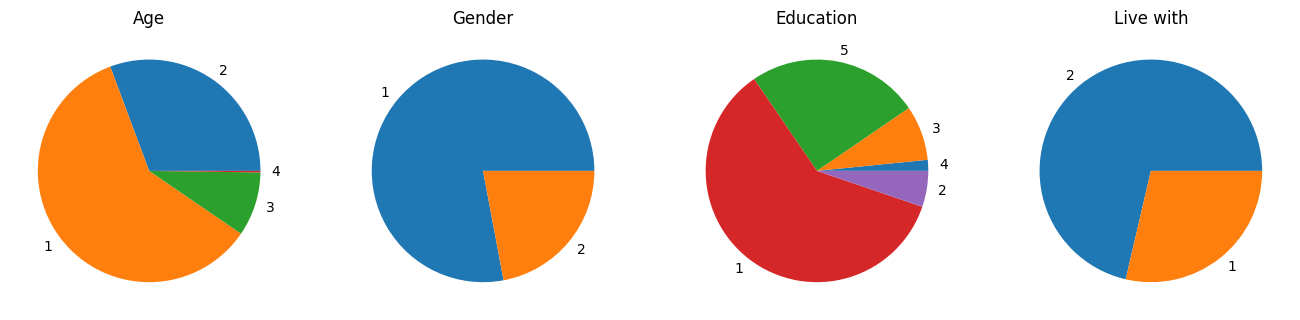

In [999]:
plt.subplot(1,4,1)
plt.subplots_adjust(left=0,right=2,bottom=1,top=2,wspace=0.2,hspace=0.4)
label_age=[2,1 ,3 ,4]
plt.title("Age")
plt.pie(df.groupby(df["Age"]).size(),labels=label_age)

plt.subplot(1,4,2)
label_gen=[1 ,2]
plt.title("Gender")
plt.pie(df.groupby(df["Gender"]).size(),labels=label_gen)

plt.subplot(1,4,3)
label_ed=[4 ,3 ,5 ,1 ,2]
plt.title("Education")
plt.pie(df.groupby(df["Education"]).size(),labels=label_ed)

plt.subplot(1,4,4)
label_lw=[2 ,1]
plt.title("Live with")
plt.pie(df.groupby(df["Live with"]).size(),labels=label_lw)

In [1000]:
# plt.subplot(1,4,1)
# plt.subplots_adjust(left=0,right=2,bottom=1,top=2,wspace=0.2,hspace=0.4)
# label_md=[1, 3, 2]
# plt.title("Motive about drug")
# plt.pie(df.groupby(df["Motive about drug"]).size(),labels=label_md)

# plt.subplot(1,4,2)
# label_st=[3, 2, 1]
# plt.title("Spend most time")
# plt.pie(df.groupby(df["Spend most time"]).size(),labels=label_st)

# plt.subplot(1,4,3)
# label_fl=[1 ,2]
# plt.title("Failure in life")
# plt.pie(df.groupby(df["Failure in life"]).size(),labels=label_fl)

# plt.subplot(1,4,4)
# label_mp=[1, 2, 3, 5, 4]
# plt.title("Mental/emotional problem")
# plt.pie(df.groupby(df["Mental/emotional problem"]).size(),labels=label_mp)

([<matplotlib.patches.Wedge at 0x274f599c548>,
 [Text(0.8415259596412235, 0.708402469822006, '2'),
  Text(-0.9616583571206053, -0.5340535592804324, '3'),
  Text(1.079623009572488, -0.21074666593244978, '1')])

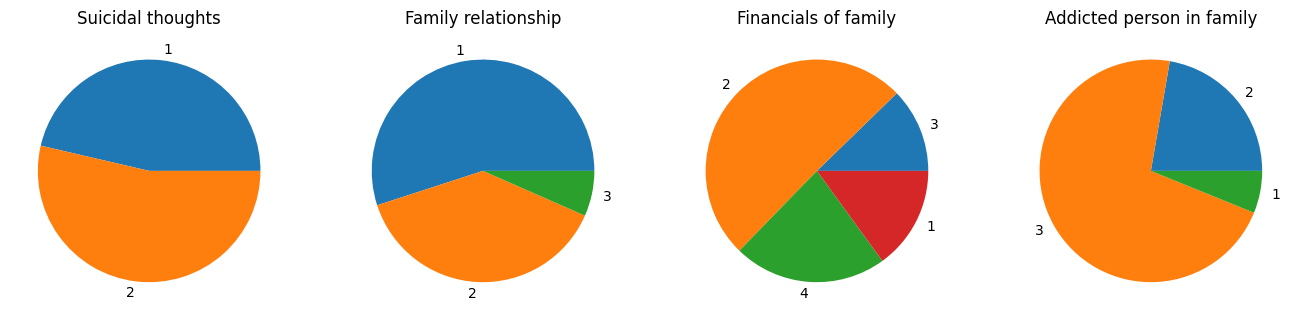

In [1001]:
plt.subplot(1,4,1)
plt.subplots_adjust(left=0,right=2,bottom=1,top=2,wspace=0.2,hspace=0.4)
label_st=[1 ,2]
plt.title("Suicidal thoughts")
plt.pie(df.groupby(df["Suicidal thoughts"]).size(),labels=label_st)

plt.subplot(1,4,2)
label_fr=[1, 2, 3]
plt.title("Family relationship")
plt.pie(df.groupby(df["Family relationship"]).size(),labels=label_fr)

plt.subplot(1,4,3)
label_ff=[3, 2 ,4 ,1]
plt.title("Financials of family")
plt.pie(df.groupby(df["Financials of family"]).size(),labels=label_ff)

plt.subplot(1,4,4)
label_af=[2, 3, 1]
plt.title("Addicted person in family")
plt.pie(df.groupby(df["Addicted person in family"]).size(),labels=label_af)

([<matplotlib.patches.Wedge at 0x27488c12148>,
 [Text(-0.17983077878106074, 1.0852008528392323, '1'),
  Text(0.08630502583501945, -1.096609065490349, '2'),
  Text(1.0959649017255995, -0.09413253521284237, '3')])

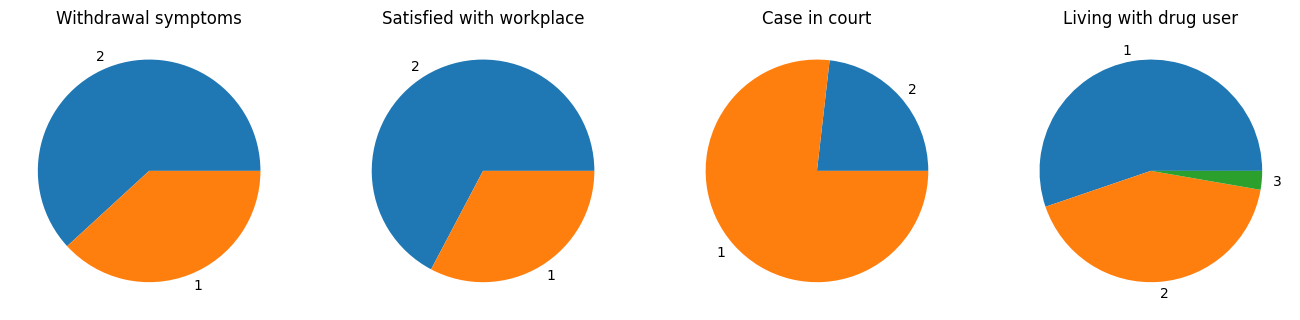

In [1002]:
plt.subplot(1,4,1)
plt.subplots_adjust(left=0,right=2,bottom=1,top=2,wspace=0.2,hspace=0.4)
label_ws=[2, 1]
plt.title("Withdrawal symptoms")
plt.pie(df.groupby(df["Withdrawal symptoms"]).size(),labels=label_ws)

plt.subplot(1,4,2)
label_sw=[2, 1]
plt.title("Satisfied with workplace")
plt.pie(df.groupby(df["Satisfied with workplace"]).size(),labels=label_sw)

plt.subplot(1,4,3)
label_cc=[2 ,1]
plt.title("Case in court")
plt.pie(df.groupby(df["Case in court"]).size(),labels=label_cc)

plt.subplot(1,4,4)
label_lu=[1, 2, 3]
plt.title("Living with drug user")
plt.pie(df.groupby(df["Living with drug user"]).size(),labels=label_lu)

([<matplotlib.patches.Wedge at 0x274fca06c08>,
 [Text(-0.21074646376924336, 1.079623049035523, '1'),
  Text(-0.2872289595280966, -1.0618378053207596, '3'),
  Text(0.9871382331420975, -0.48534328950661115, '2')])

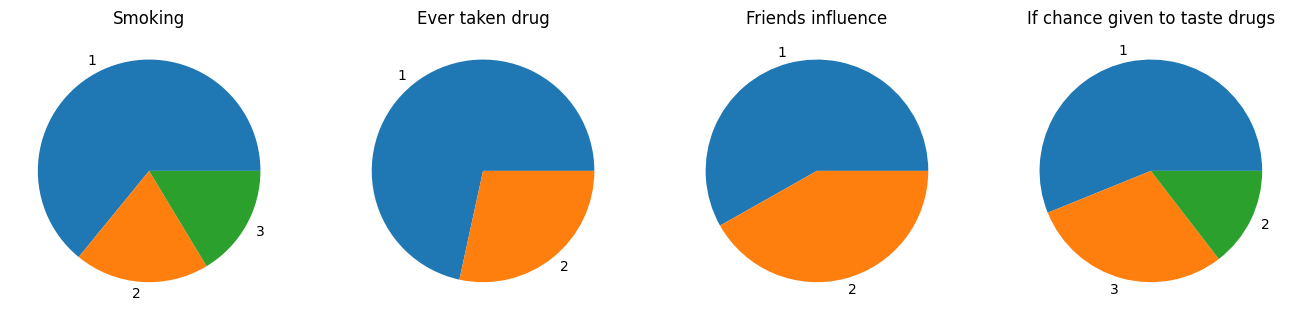

In [1003]:
plt.subplot(1,4,1)
plt.subplots_adjust(left=0,right=2,bottom=1,top=2,wspace=0.2,hspace=0.4)
label_s=[1, 2, 3]
plt.title("Smoking")
plt.pie(df.groupby(df["Smoking"]).size(),labels=label_s)

plt.subplot(1,4,2)
label_etd=[1, 2]
plt.title("Ever taken drug")
plt.pie(df.groupby(df["Ever taken drug"]).size(),labels=label_etd)

plt.subplot(1,4,3)
label_fi=[1, 2]
plt.title("Friends influence")
plt.pie(df.groupby(df["Friends influence"]).size(),labels=label_fi)

plt.subplot(1,4,4)
label_id=[1, 3, 2]
plt.title("If chance given to taste drugs")
plt.pie(df.groupby(df["If chance given to taste drugs"]).size(),labels=label_id)

In [1004]:
# Class

# 1 - regularly
# 2 - once/twice a week
# 3 - occasionally
# 4 - never/not applicable

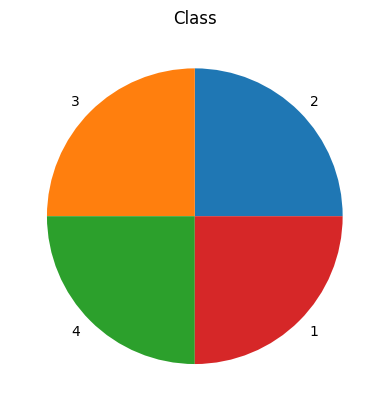

In [1005]:
plt.figure()
label_c=[2, 3, 4, 1]
plt.title("Class")
plt.pie(df.groupby(df["Class"]).size(),labels=label_c)
plt.show()

<AxesSubplot:title={'center':'Education'}, xlabel='Class', ylabel='Education'>

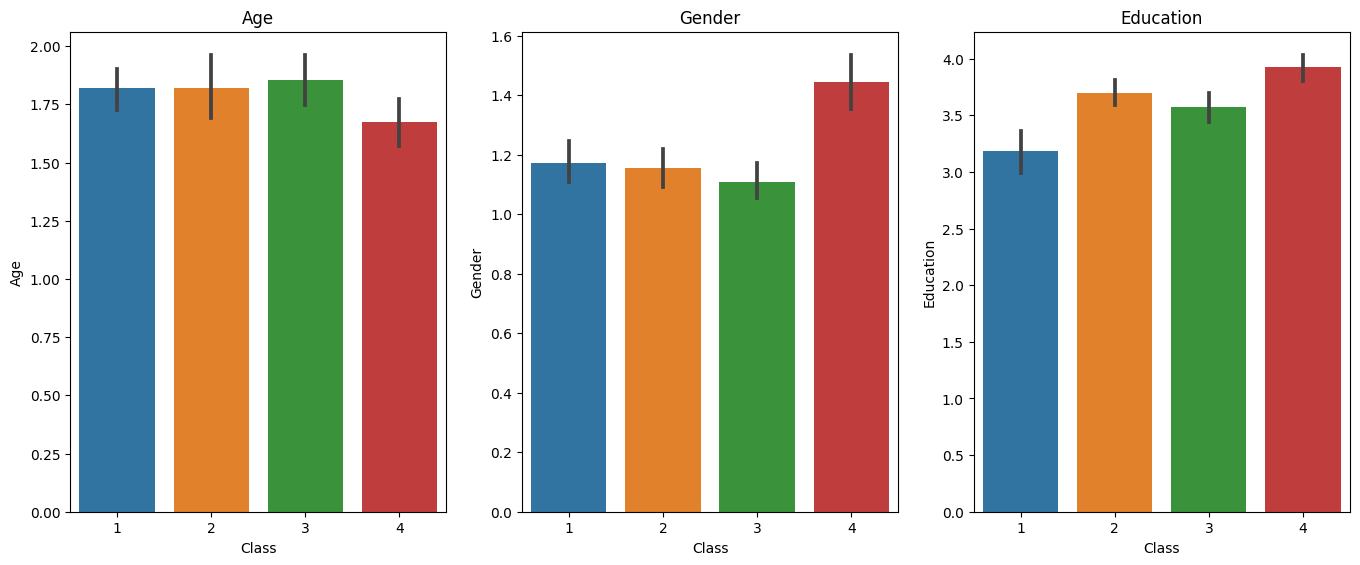

In [1006]:
plt.subplot(1,3,1)
plt.subplots_adjust(left=0,right=2,bottom=1,top=2,wspace=0.2,hspace=0.4)
plt.title("Age")
sns.barplot(data=df,x="Class",y="Age")

plt.subplot(1,3,2)
plt.title("Gender")
sns.barplot(data=df,x="Class",y="Gender")

plt.subplot(1,3,3)
plt.title("Education")
sns.barplot(data=df,x="Class",y="Education")

<AxesSubplot:title={'center':'Education'}, xlabel='Class', ylabel='Education'>

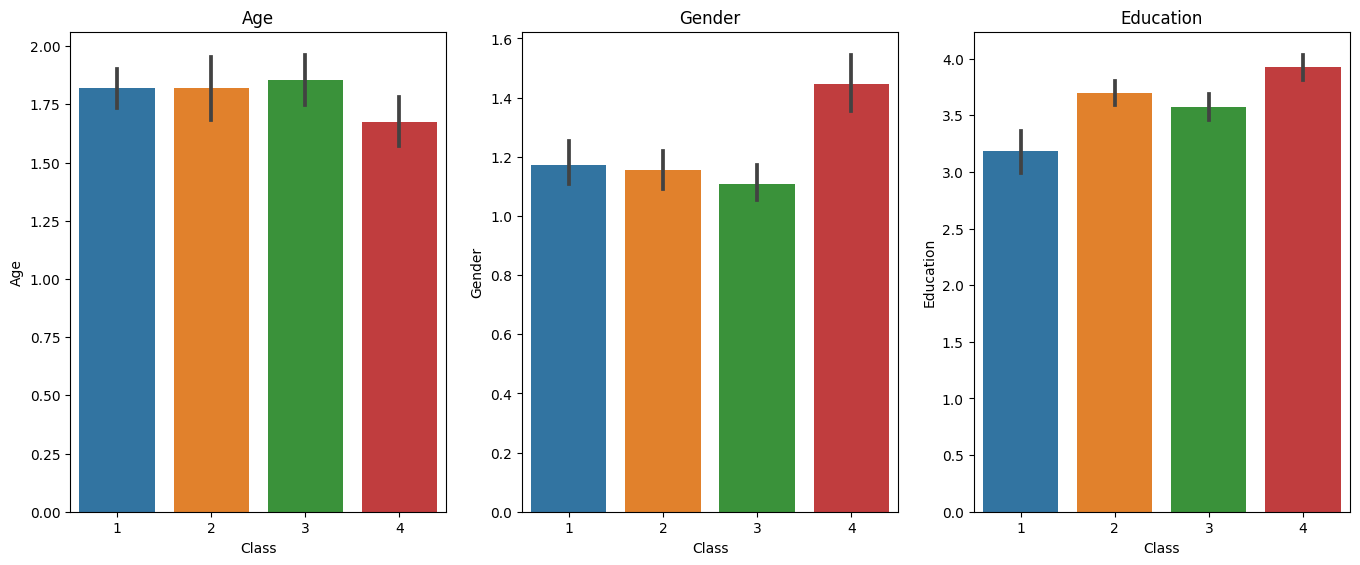

In [1007]:
plt.subplot(1,3,1)
plt.subplots_adjust(left=0,right=2,bottom=1,top=2,wspace=0.2,hspace=0.4)
plt.title("Age")
sns.barplot(data=df,x="Class",y="Age")

plt.subplot(1,3,2)
plt.title("Gender")
sns.barplot(data=df,x="Class",y="Gender")

plt.subplot(1,3,3)
plt.title("Education")
sns.barplot(data=df,x="Class",y="Education")

<AxesSubplot:title={'center':'Spend most time'}, xlabel='Class', ylabel='Spend most time'>

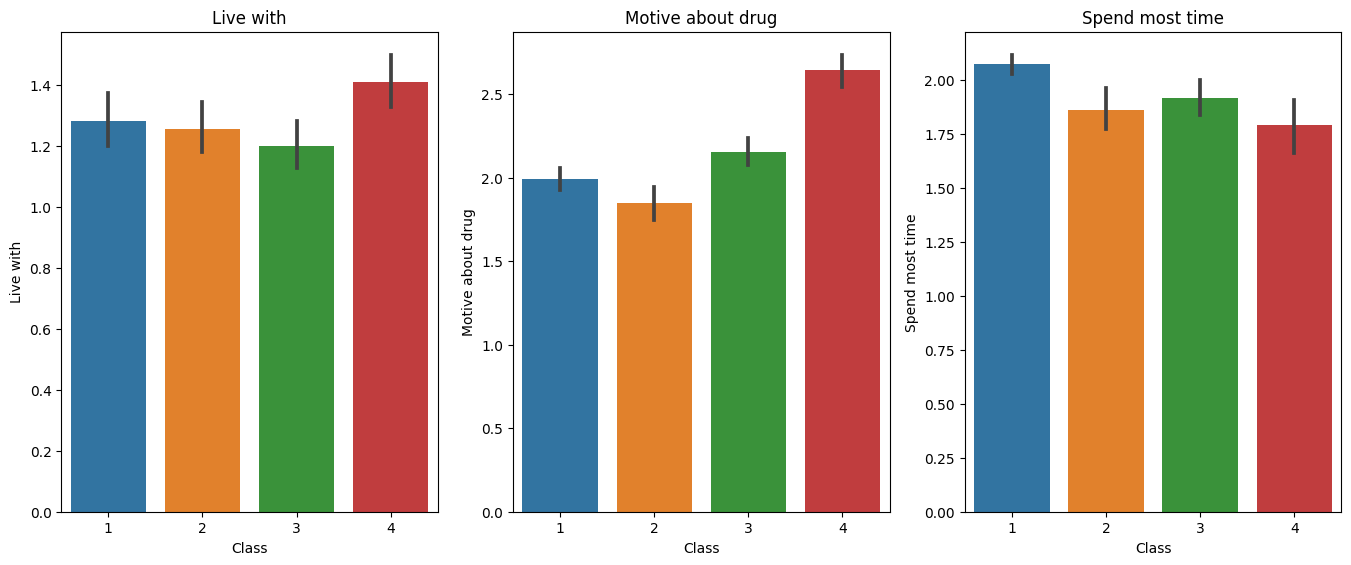

In [1008]:
plt.subplot(1,3,1)
plt.subplots_adjust(left=0,right=2,bottom=1,top=2,wspace=0.2,hspace=0.4)
plt.title("Live with")
sns.barplot(data=df,x="Class",y="Live with")

plt.subplot(1,3,2)
plt.title("Motive about drug")
sns.barplot(data=df,x="Class",y="Motive about drug")

plt.subplot(1,3,3)
plt.title("Spend most time")
sns.barplot(data=df,x="Class",y="Spend most time")

<AxesSubplot:title={'center':'Addicted person in family'}, xlabel='Class', ylabel='Addicted person in family'>

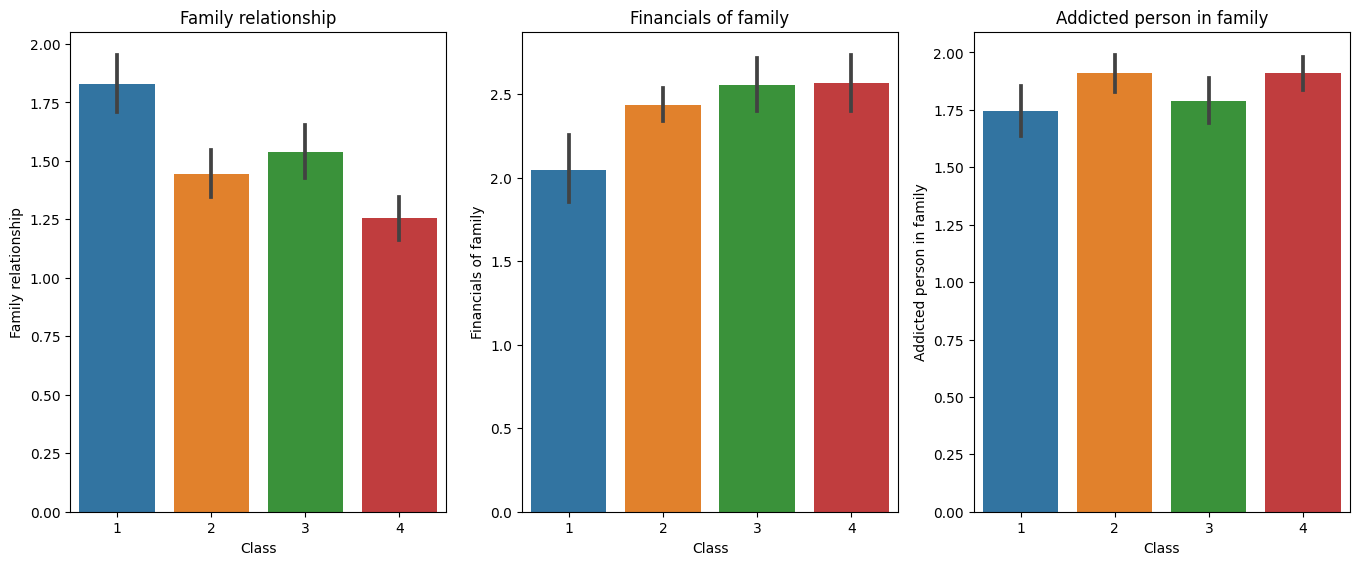

In [1009]:
plt.subplot(1,3,1)
plt.subplots_adjust(left=0,right=2,bottom=1,top=2,wspace=0.2,hspace=0.4)
plt.title("Family relationship")
sns.barplot(data=df,x="Class",y="Family relationship")

plt.subplot(1,3,2)
plt.title("Financials of family")
sns.barplot(data=df,x="Class",y="Financials of family")

plt.subplot(1,3,3)
plt.title("Addicted person in family")
sns.barplot(data=df,x="Class",y="Addicted person in family")

<AxesSubplot:title={'center':'Case in court'}, xlabel='Class', ylabel='Case in court'>

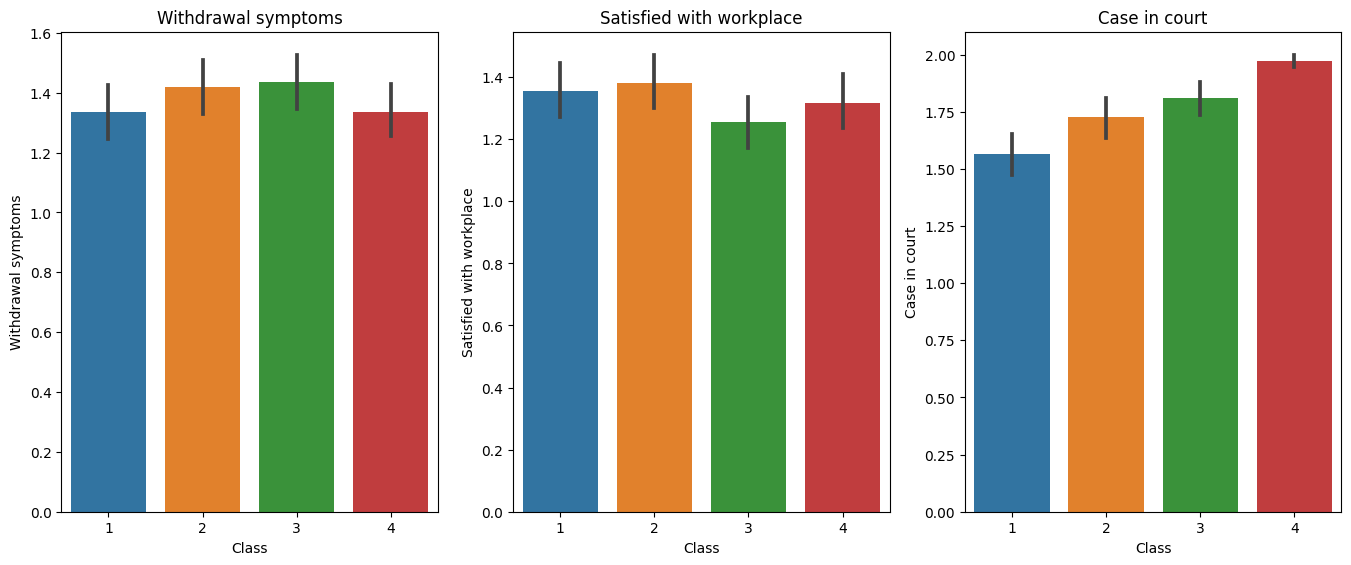

In [1010]:
plt.subplot(1,3,1)
plt.subplots_adjust(left=0,right=2,bottom=1,top=2,wspace=0.2,hspace=0.4)
plt.title("Withdrawal symptoms")
sns.barplot(data=df,x="Class",y="Withdrawal symptoms")

plt.subplot(1,3,2)
plt.title("Satisfied with workplace")
sns.barplot(data=df,x="Class",y="Satisfied with workplace")

plt.subplot(1,3,3)
plt.title("Case in court")
sns.barplot(data=df,x="Class",y="Case in court")

<AxesSubplot:title={'center':'Ever taken drug'}, xlabel='Class', ylabel='Ever taken drug'>

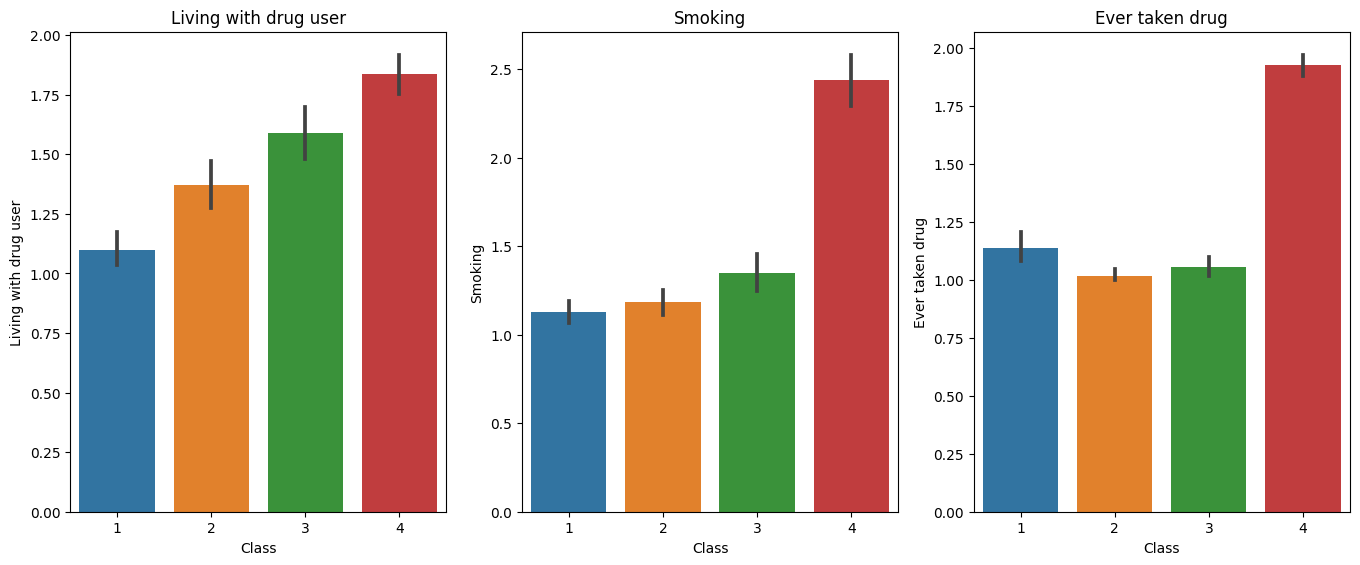

In [1011]:
plt.subplot(1,3,1)
plt.subplots_adjust(left=0,right=2,bottom=1,top=2,wspace=0.2,hspace=0.4)
plt.title("Living with drug user")
sns.barplot(data=df,x="Class",y="Living with drug user")

plt.subplot(1,3,2)
plt.title("Smoking")
sns.barplot(data=df,x="Class",y="Smoking")

plt.subplot(1,3,3)
plt.title("Ever taken drug")
sns.barplot(data=df,x="Class",y="Ever taken drug")

<AxesSubplot:title={'center':'Easy to control use of drug'}, xlabel='Class', ylabel='Easy to control use of drug'>

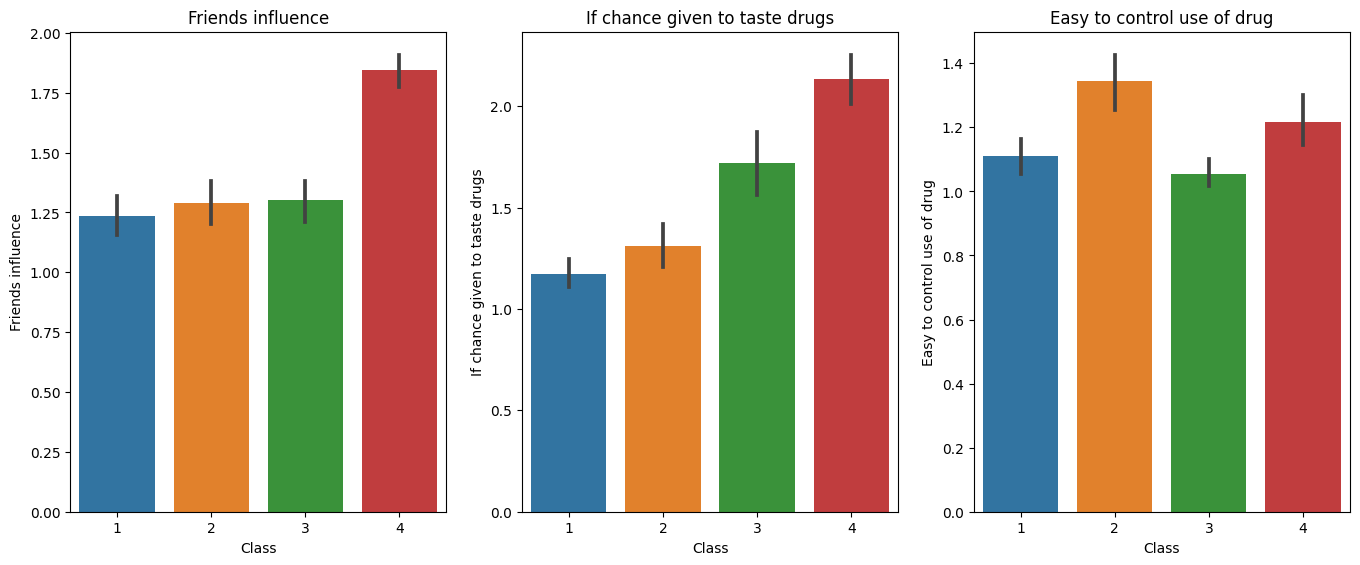

In [1012]:
plt.subplot(1,3,1)
plt.subplots_adjust(left=0,right=2,bottom=1,top=2,wspace=0.2,hspace=0.4)
plt.title("Friends influence")
sns.barplot(data=df,x="Class",y="Friends influence")

plt.subplot(1,3,2)
plt.title("If chance given to taste drugs")
sns.barplot(data=df,x="Class",y="If chance given to taste drugs")

plt.subplot(1,3,3)
plt.title("Easy to control use of drug")
sns.barplot(data=df,x="Class",y="Easy to control use of drug")

In [1013]:
df.columns

Index(['Age', 'Gender', 'Education', 'Live with', 'Motive about drug',
       'Spend most time', 'Failure in life', 'Mental/emotional problem',
       'Suicidal thoughts', 'Family relationship', 'Financials of family',
       'Addicted person in family', 'Withdrawal symptoms',
       'Satisfied with workplace', 'Case in court', 'Living with drug user',
       'Smoking', 'Ever taken drug', 'Friends influence',
       'If chance given to taste drugs', 'Easy to control use of drug',
       'Class'],
      dtype='object')

In [1014]:
X=df[['Age', 'Gender', 'Education', 'Live with', 'Motive about drug',
       'Spend most time', 'Failure in life', 'Mental/emotional problem',
       'Suicidal thoughts', 'Family relationship', 'Financials of family',
       'Addicted person in family', 'Withdrawal symptoms',
       'Satisfied with workplace', 'Case in court', 'Living with drug user',
       'Smoking', 'Ever taken drug', 'Friends influence',
       'If chance given to taste drugs', 'Easy to control use of drug']]
y=df['Class']

In [1015]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [1016]:
# model_etc=ExtraTreesClassifier(n_estimators=100).fit(X,y)
# model_skb_chi=SelectKBest(chi2,k=20).fit(X,y)
# model_skb_fc=SelectKBest(f_classif,k=20).fit(X,y)
# scores=pd.DataFrame({"col": X, "ETC":model_etc.feature_importances_,"SKB_Chi":model_skb_chi.scores_,"SKB_Fc":model_skb_fc.scores_})
# scores=scores.sort_values(by=["ETC","SKB_Chi","SKB_Fc"], axis=0, ascending=False, kind="quicksort", na_position="last")


Sucidial thoughts in male and female.

<AxesSubplot:xlabel='Suicidal thoughts', ylabel='count'>

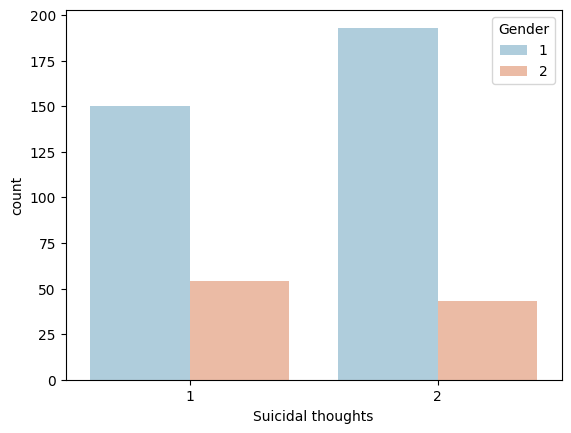

In [1017]:
sns.countplot(x='Suicidal thoughts',hue='Gender',data=df,palette='RdBu_r')

From the above plot we see suicidal thoughts are more in Male compared to Female.

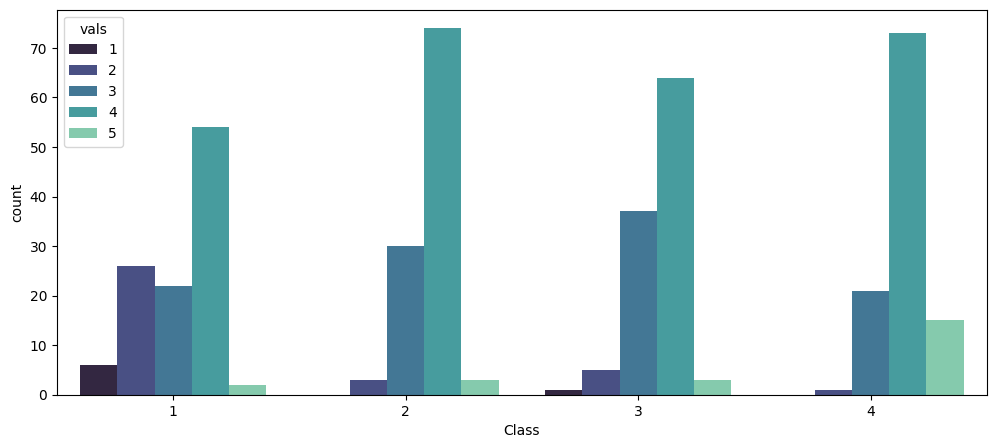

In [1018]:
df01 = df.melt( id_vars=['Class'],value_vars=['Education'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Class", hue='vals', data=df01, palette='mako')

Here in Eduaction:
* 1 = Primary Eduaction 
* 2 = S.S.C/O levels 
* 3 = H.S.C/A levels
* 4 = Undergraduate
* 5 = Postgraduate (Msc/Phd)

and for class:
* 1 = Regularly
* 2 = Once/twice a week
* 3 = Occasionally
* 4 = Never/not applicable

From the above plot we see Regular usage of Drug is more common in undergraduates than compared to others

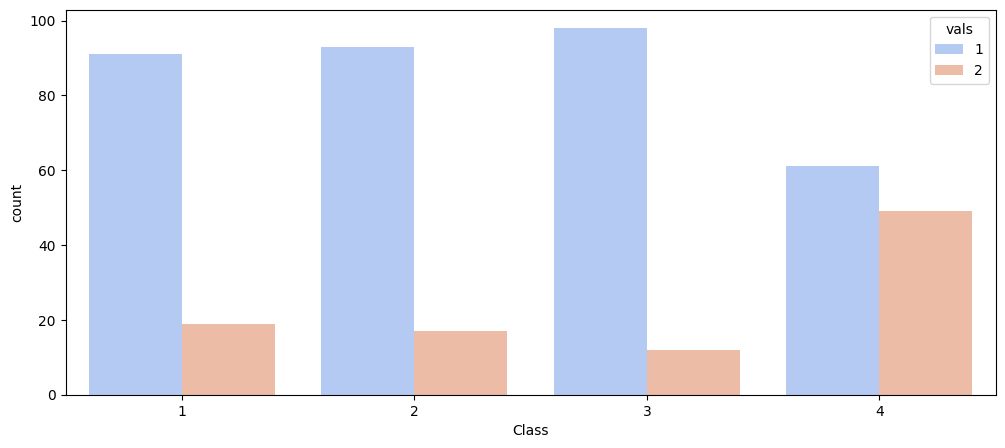

In [1019]:
df01 = df.melt( id_vars=['Class'],value_vars=['Gender'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Class", hue='vals', data=df01, palette='coolwarm')

Here in Gender:
* 1 = Male
* 2 = Female

and for class:
* 1 = Regularly
* 2 = Once/twice a week
* 3 = Occasionally
* 4 = Never/not applicable

From the above plot we see Regularly usage of drug is more in Male compared to Female.

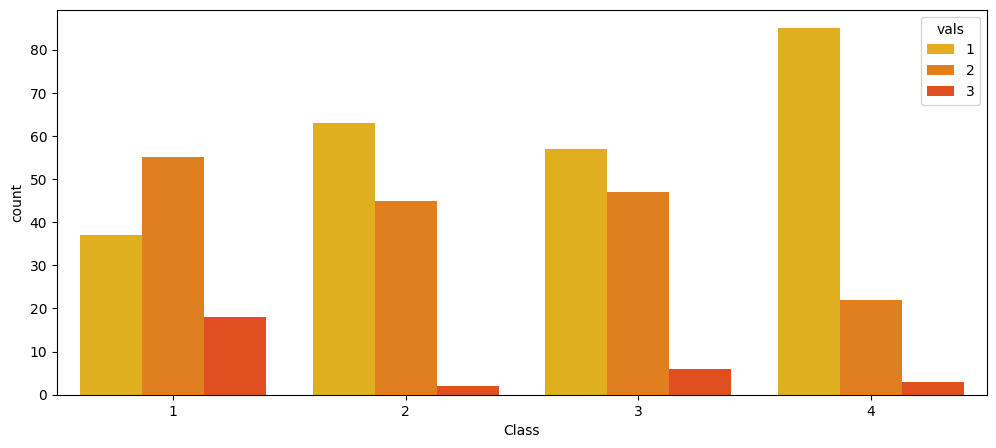

In [1020]:
df01 = df.melt( id_vars=['Class'],value_vars=['Family relationship'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Class", hue='vals', data=df01, palette='autumn_r')

Here in Family Relationship :
* 1 = Satisfactory
* 2 = Average
* 3 - Communication gap


and for class:
* 1 = Regularly
* 2 = Once/twice a week
* 3 = Occasionally
* 4 = Never/not applicable

From the above plot we see Regularly usage of drug is more in person whose Family relationship is average.

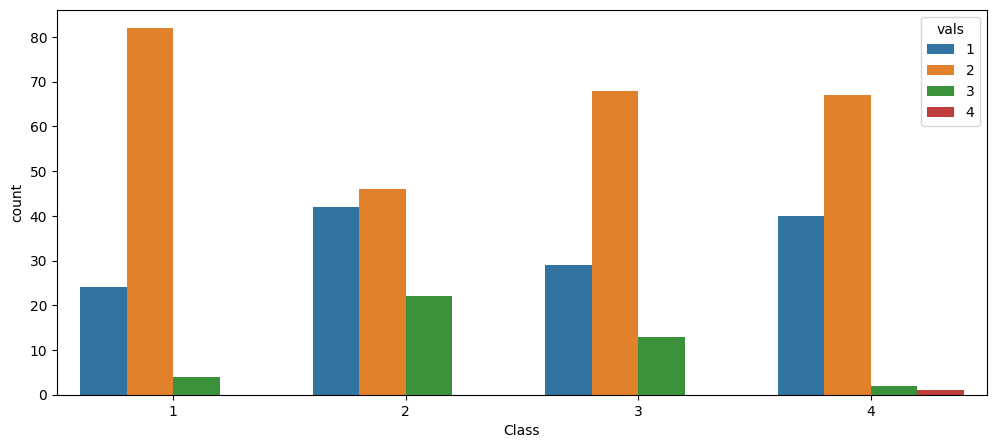

In [1021]:
df01 = df.melt( id_vars=['Class'],value_vars=['Age'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Class", hue='vals', data=df01)

Here in age:

* 1 = between 15 to 22 years
* 2 = between 22 to 35 years
* 3 = between 35 to 48 years
* 4 = above 48 years

and for class:

* 1 = Regularly
* 2 = Once/twice a week
* 3 = Occasionally
* 4 = Never/not applicable

From the above plot we see Regularly usage of drug is more between age group of 22 to 35

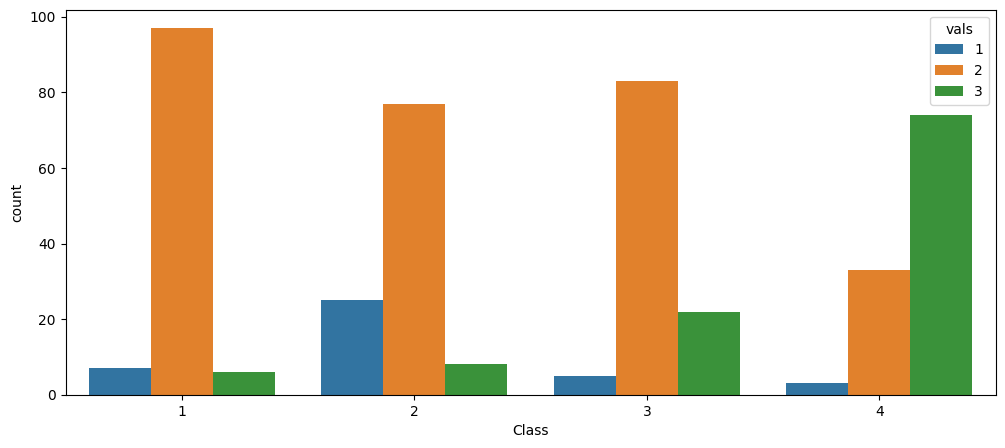

In [1022]:
df01 = df.melt( id_vars=['Class'],value_vars=['Motive about drug'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Class", hue='vals', data=df01)

Here in Motive about drug:

* 1 = Disease
* 2 = Social trends
* 3 = Should avoid

and for class:
* 1 = Regularly
* 2 = Once/twice a week
* 3 = Occasionally
* 4 = Never/not applicable

From the above plot we see Regularly usage of drug is more in people who are influenced by social trends

In [1023]:
corr = df.corr()

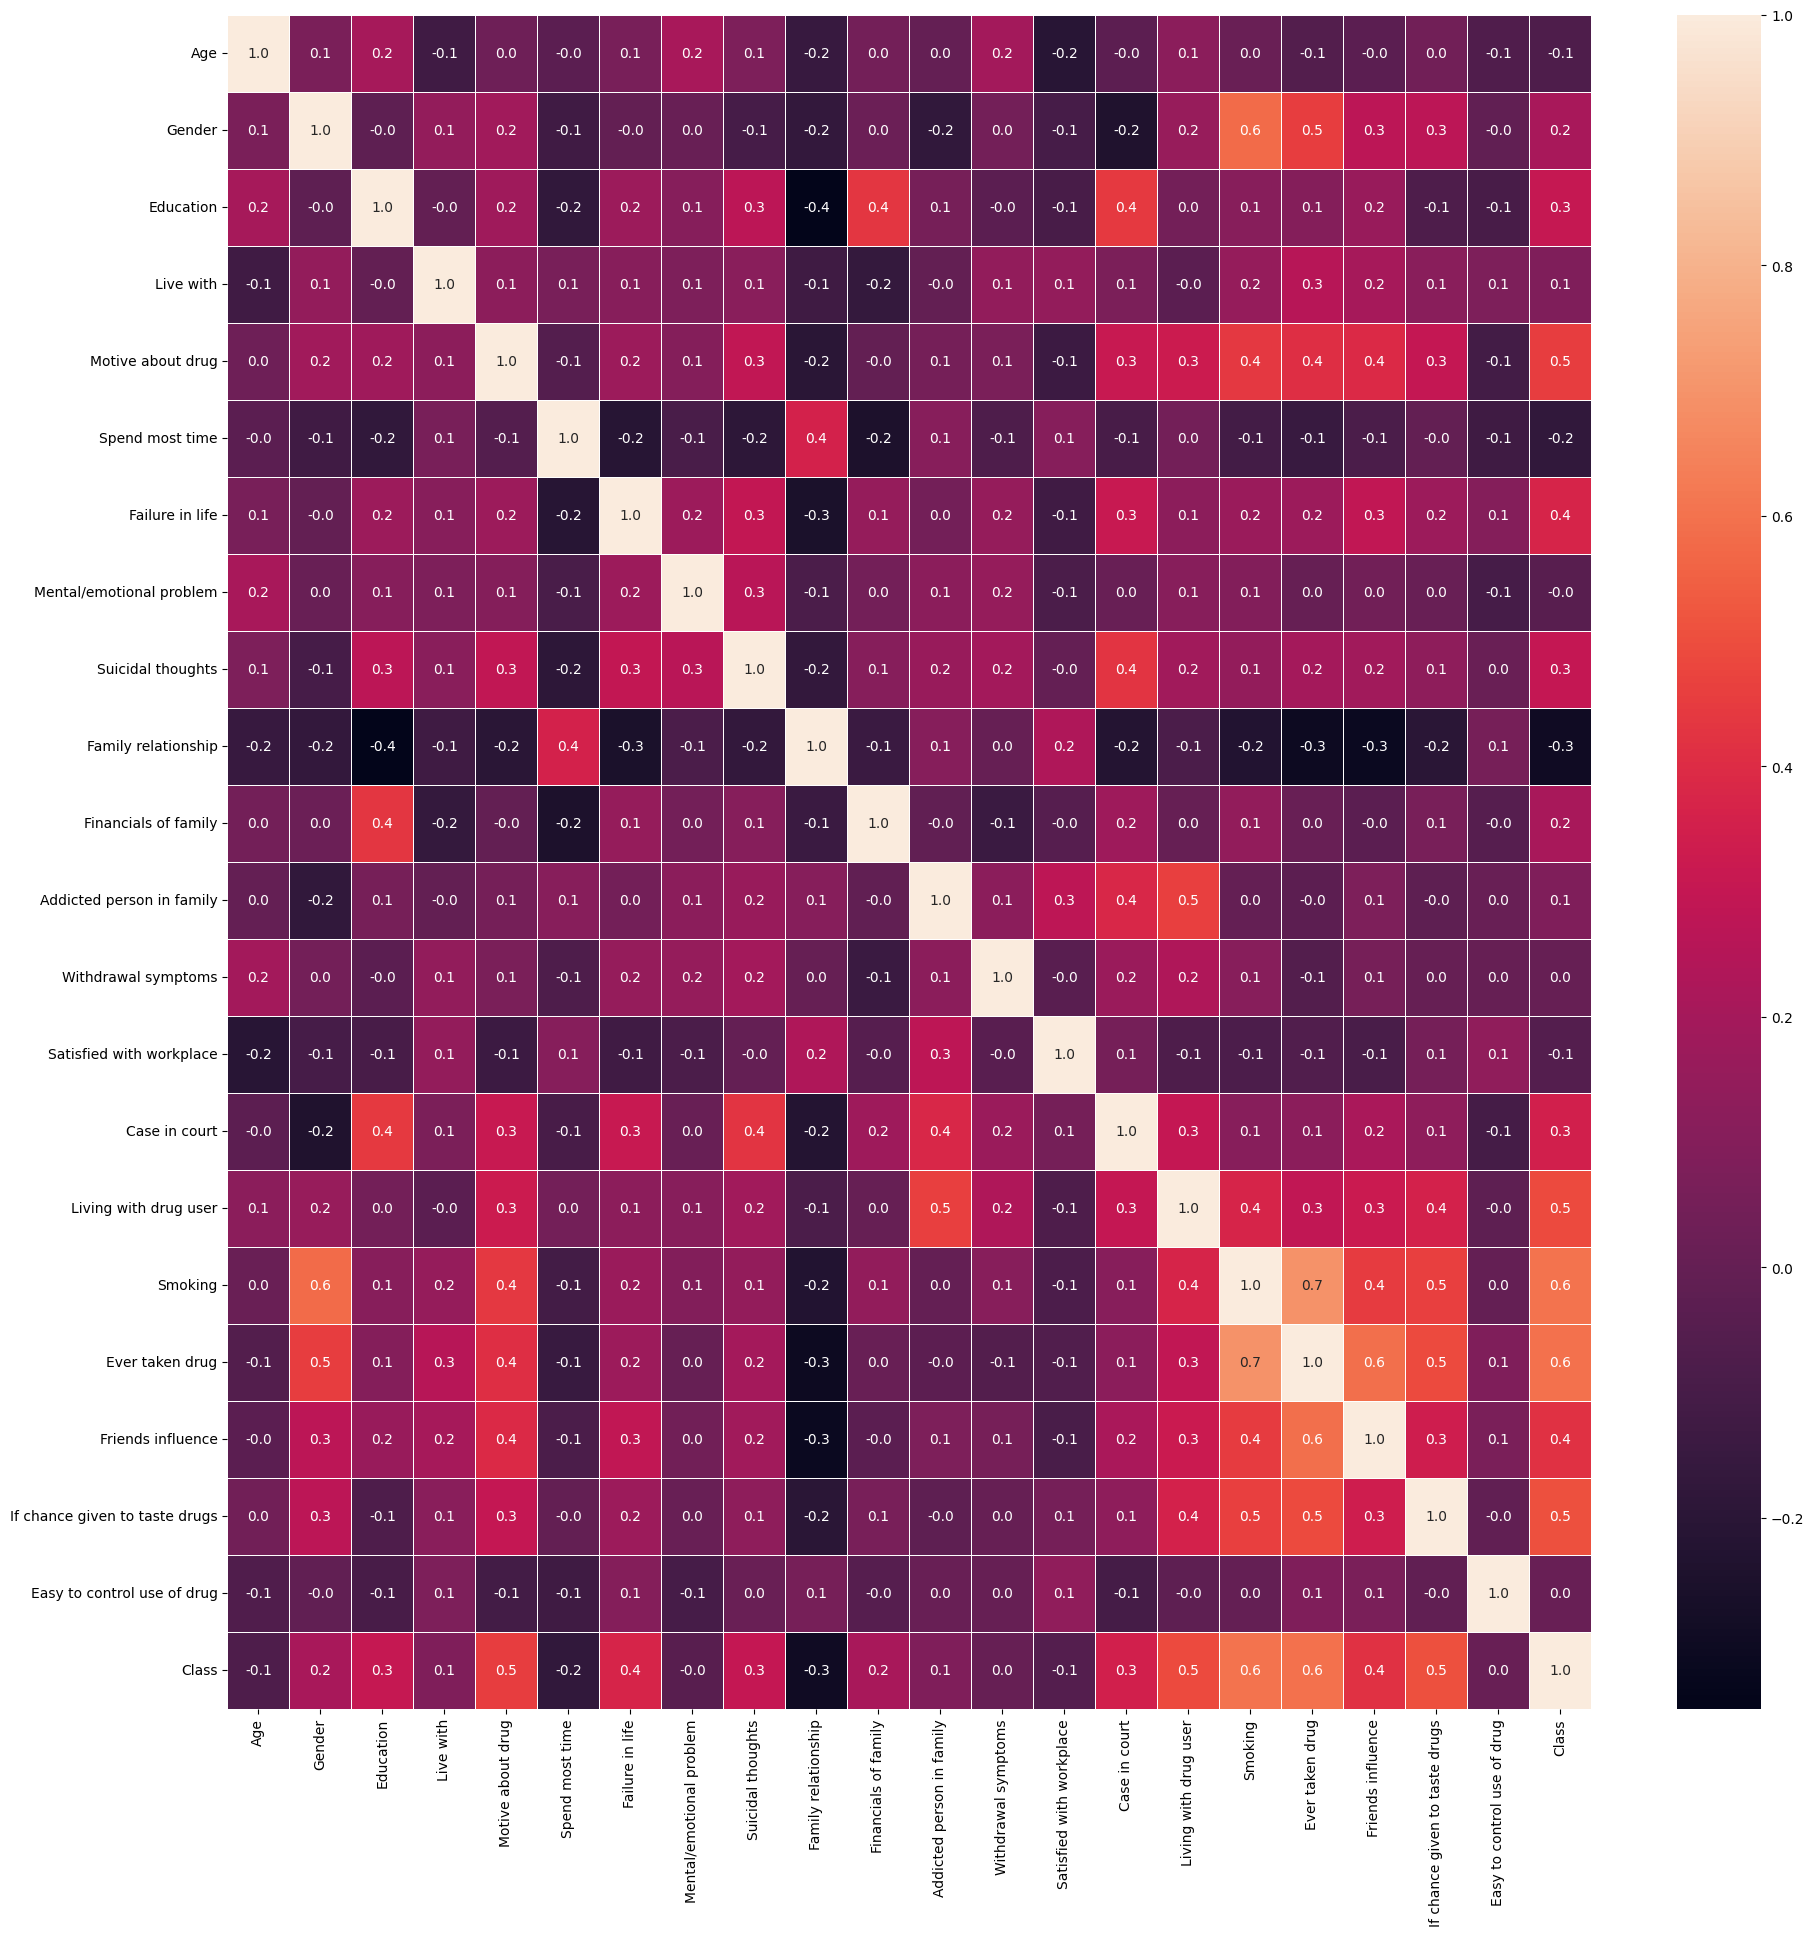

In [1024]:
f,ax = plt.subplots(figsize=(22, 22))
hp = sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [1025]:
# hp.figure.savefig("output_hm")

# Train Test Split Data

In [1026]:
from sklearn.model_selection import train_test_split

In [1027]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=100)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(396, 21) (396,)
(44, 21) (44,)


In [1028]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [1029]:
X_train=scaler.fit_transform(X_train)

In [1030]:
X_test=scaler.fit_transform(X_test)

In [1031]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [1032]:
X_train

array([[ 0.320203  , -0.546224  ,  0.53272669, ...,  1.19559519,
        -0.80829038, -0.47540109],
       [ 0.320203  , -0.546224  ,  0.53272669, ...,  1.19559519,
         1.96299092, -0.47540109],
       [-1.32655528,  1.83075076,  0.53272669, ...,  1.19559519,
         0.57735027, -0.47540109],
       ...,
       [ 1.96696127, -0.546224  , -0.74581737, ..., -0.8364035 ,
         0.57735027, -0.47540109],
       [ 0.320203  ,  1.83075076, -2.02436143, ...,  1.19559519,
         0.57735027, -0.47540109],
       [ 0.320203  , -0.546224  ,  0.53272669, ..., -0.8364035 ,
         1.96299092, -0.47540109]])

In [1033]:
X_test

array([[ 0.60683505,  2.51661148,  1.86809955, -0.87177979,  1.45042561,
        -1.61789704,  1.46385011,  0.14650252,  0.91287093, -0.6989263 ,
         1.41174961,  0.29851116, -0.64757613, -0.79349205,  0.57735027,
         1.2094158 ,  2.36798258,  1.73205081,  1.04653624,  0.50709255,
        -0.43495884],
       [-1.17321442, -0.39735971, -1.01598396,  1.14707867, -0.185952  ,
         0.30608863, -0.68313005, -0.77437044,  0.91287093,  0.91963987,
        -0.62487278,  0.29851116,  1.54421999,  1.26025208,  0.57735027,
        -0.69109474, -0.56698174, -0.57735027, -0.95553309, -0.73246702,
        -0.43495884],
       [ 0.60683505, -0.39735971,  0.42605779, -0.87177979, -0.185952  ,
         0.30608863, -0.68313005,  0.14650252,  0.91287093, -0.6989263 ,
         1.41174961, -1.89057066, -0.64757613, -0.79349205, -1.73205081,
        -0.69109474, -0.56698174, -0.57735027, -0.95553309, -0.73246702,
        -0.43495884],
       [ 0.60683505, -0.39735971,  0.42605779, -0.87177979

# Random Forest Classifier

In [1034]:
from sklearn.ensemble import RandomForestClassifier

In [1035]:
model_rc = RandomForestClassifier().fit(X_train,y_train)
# model_rc=model_rc.predict(X_test)

In [1036]:
model_rc

RandomForestClassifier()

In [1037]:
res = model_rc.predict(X_test)
res

array([4, 1, 3, 1, 4, 3, 4, 2, 3, 2, 3, 2, 1, 4, 4, 1, 2, 3, 2, 4, 2, 1,
       1, 4, 1, 4, 2, 1, 3, 4, 1, 3, 3, 2, 1, 1, 2, 3, 2, 2, 2, 4, 3, 2])

In [1038]:
from sklearn.metrics import accuracy_score

In [1039]:
accuracy_score(y_test,res)

0.9772727272727273

In [1040]:
from sklearn.metrics import confusion_matrix

In [1041]:
confusion_matrix(y_test,res)

array([[11,  0,  1,  0],
       [ 0, 13,  0,  0],
       [ 0,  0,  9,  0],
       [ 0,  0,  0, 10]], dtype=int64)

In [1042]:
from sklearn.metrics import classification_report

In [1043]:
print(classification_report(y_test,res))

              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00        13
           3       0.90      1.00      0.95         9
           4       1.00      1.00      1.00        10

    accuracy                           0.98        44
   macro avg       0.97      0.98      0.98        44
weighted avg       0.98      0.98      0.98        44



In [1044]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [1045]:
print(mean_absolute_error(y_test, res))
print(mean_squared_error(y_test, res))
print(np.sqrt(mean_squared_error(y_test, res)))

0.045454545454545456
0.09090909090909091
0.30151134457776363


# Gaussian Naive Bayes

In [1046]:
from sklearn.naive_bayes import GaussianNB

In [1047]:
nbModel = GaussianNB()
nbModel = nbModel.fit(X_train,y_train)

In [1048]:
y_pred = nbModel.predict(X_test)

In [1049]:
y_pred

array([4, 1, 1, 1, 4, 3, 4, 2, 2, 2, 3, 2, 1, 4, 4, 1, 2, 3, 3, 4, 2, 1,
       1, 4, 2, 4, 2, 2, 2, 4, 1, 3, 3, 2, 1, 1, 2, 2, 2, 2, 2, 4, 3, 3])

In [1050]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

In [1051]:
nb_acc = accuracy_score(y_test,y_pred)
nb_f1 = f1_score(y_test,y_pred,average='weighted')
nb_recall = recall_score(y_test,y_pred,average='weighted')
nb_precision = precision_score(y_test,y_pred,average='weighted')

print('Model Accuracy : {0:0.3f}'.format(nb_acc))
print('F1_Score : {0:0.3f}'.format(nb_f1))
print('Recall_Score : {0:0.3f}'.format(nb_recall))
print('Precision_Score : {0:0.3f}'.format(nb_precision))
print(classification_report(y_test,y_pred))

Model Accuracy : 0.818
F1_Score : 0.819
Recall_Score : 0.818
Precision_Score : 0.829
              precision    recall  f1-score   support

           1       0.90      0.75      0.82        12
           2       0.69      0.85      0.76        13
           3       0.75      0.67      0.71         9
           4       1.00      1.00      1.00        10

    accuracy                           0.82        44
   macro avg       0.83      0.82      0.82        44
weighted avg       0.83      0.82      0.82        44



In [1052]:
from sklearn.metrics import confusion_matrix

In [1053]:
confusion_matrix(y_test,y_pred)

array([[ 9,  3,  0,  0],
       [ 0, 11,  2,  0],
       [ 1,  2,  6,  0],
       [ 0,  0,  0, 10]], dtype=int64)

In [1054]:
cm4 = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm4)

print('\nTrue Positives(TP) = ', cm4[0,0])

print('\nTrue Negatives(TN) = ', cm4[1,1])

print('\nFalse Positives(FP) = ', cm4[0,1])

print('\nFalse Negatives(FN) = ', cm4[1,0])

Confusion matrix

 [[ 9  3  0  0]
 [ 0 11  2  0]
 [ 1  2  6  0]
 [ 0  0  0 10]]

True Positives(TP) =  9

True Negatives(TN) =  11

False Positives(FP) =  3

False Negatives(FN) =  0


In [1055]:
from sklearn.metrics import classification_report

In [1056]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.90      0.75      0.82        12
           2       0.69      0.85      0.76        13
           3       0.75      0.67      0.71         9
           4       1.00      1.00      1.00        10

    accuracy                           0.82        44
   macro avg       0.83      0.82      0.82        44
weighted avg       0.83      0.82      0.82        44



# K-Nearest Neighbor(KNN Algorithm)

In [1057]:
from sklearn.neighbors import KNeighborsClassifier

In [1058]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [1059]:
pred1 = knn_model.predict(X_train)
pred = knn_model.predict(X_test)


In [1060]:
pred

array([4, 1, 3, 1, 4, 3, 3, 2, 3, 2, 3, 2, 1, 4, 4, 1, 2, 3, 2, 4, 2, 1,
       1, 4, 2, 4, 2, 1, 3, 4, 1, 3, 3, 2, 1, 1, 2, 3, 2, 2, 2, 4, 3, 2])

In [1061]:
pred1

array([1, 4, 4, 2, 2, 3, 3, 4, 4, 4, 3, 1, 2, 1, 3, 3, 4, 1, 3, 2, 4, 4,
       2, 3, 4, 2, 3, 4, 4, 3, 1, 1, 4, 2, 1, 3, 3, 1, 4, 2, 4, 3, 4, 2,
       1, 3, 1, 4, 2, 3, 2, 4, 4, 4, 2, 2, 2, 1, 1, 3, 2, 1, 1, 4, 1, 1,
       1, 1, 2, 4, 1, 3, 1, 3, 3, 3, 2, 1, 2, 4, 1, 2, 2, 1, 1, 3, 3, 4,
       3, 1, 4, 1, 2, 4, 4, 4, 1, 1, 2, 1, 2, 4, 2, 3, 4, 4, 1, 2, 1, 2,
       1, 2, 4, 4, 2, 1, 4, 1, 3, 2, 2, 2, 1, 4, 2, 4, 4, 1, 1, 3, 3, 1,
       4, 2, 1, 2, 2, 3, 2, 4, 4, 3, 3, 2, 1, 4, 4, 3, 1, 3, 1, 3, 3, 4,
       2, 3, 2, 2, 1, 2, 1, 4, 4, 3, 1, 1, 4, 1, 2, 2, 3, 4, 2, 2, 3, 2,
       2, 4, 3, 1, 3, 3, 2, 2, 2, 4, 2, 3, 1, 4, 3, 3, 2, 2, 4, 1, 3, 3,
       2, 1, 4, 2, 2, 3, 4, 3, 1, 2, 1, 2, 2, 3, 4, 3, 2, 1, 4, 2, 2, 4,
       4, 3, 3, 3, 2, 4, 1, 2, 1, 3, 3, 2, 3, 3, 3, 3, 4, 1, 4, 3, 3, 2,
       4, 3, 4, 2, 4, 1, 4, 2, 4, 3, 4, 3, 4, 4, 1, 4, 1, 1, 1, 3, 3, 4,
       4, 1, 2, 2, 3, 1, 3, 1, 2, 1, 1, 1, 4, 2, 1, 4, 1, 1, 3, 1, 2, 4,
       2, 2, 3, 1, 1, 3, 2, 1, 4, 2, 1, 3, 1, 2, 4,

In [1062]:
accuracy_score(y_train,pred1)

0.898989898989899

In [1063]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
knn_acc = accuracy_score(y_test,pred)
knn_f1 = f1_score(y_test,pred,average='weighted')
knn_recall = recall_score(y_test,pred,average='weighted')
knn_precision = precision_score(y_test,pred,average='weighted')

print('Model Accuracy : {0:0.3f}'.format(knn_acc))
print('F1_Score : {0:0.3f}'.format(knn_f1))
print('Recall_Score : {0:0.3f}'.format(knn_recall))
print('Precision_Score : {0:0.3f}'.format(knn_precision))
print(classification_report(y_test,pred))

Model Accuracy : 0.932
F1_Score : 0.932
Recall_Score : 0.932
Precision_Score : 0.942
              precision    recall  f1-score   support

           1       1.00      0.83      0.91        12
           2       0.93      1.00      0.96        13
           3       0.82      1.00      0.90         9
           4       1.00      0.90      0.95        10

    accuracy                           0.93        44
   macro avg       0.94      0.93      0.93        44
weighted avg       0.94      0.93      0.93        44



In [1064]:
cm0 = confusion_matrix(y_test, pred)

print('Confusion matrix\n\n', cm0)

print('\nTrue Positives(TP) = ', cm0[0,0])

print('\nTrue Negatives(TN) = ', cm0[1,1])

print('\nFalse Positives(FP) = ', cm0[0,1])

print('\nFalse Negatives(FN) = ', cm0[1,0])

Confusion matrix

 [[10  1  1  0]
 [ 0 13  0  0]
 [ 0  0  9  0]
 [ 0  0  1  9]]

True Positives(TP) =  10

True Negatives(TN) =  13

False Positives(FP) =  1

False Negatives(FN) =  0


In [1065]:

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      0.83      0.91        12
           2       0.93      1.00      0.96        13
           3       0.82      1.00      0.90         9
           4       1.00      0.90      0.95        10

    accuracy                           0.93        44
   macro avg       0.94      0.93      0.93        44
weighted avg       0.94      0.93      0.93        44



# Descision Tree Classisfier

In [1066]:
from sklearn.tree import DecisionTreeClassifier

In [1067]:
dt = DecisionTreeClassifier(max_depth=14)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=14)

In [1068]:
y_predict_train = dt.predict(X_train)
y_predict_test = dt.predict(X_test)

In [1069]:
print(accuracy_score(y_train, y_predict_train))
confusion_matrix(y_train, y_predict_train)

1.0


array([[ 98,   0,   0,   0],
       [  0,  97,   0,   0],
       [  0,   0, 101,   0],
       [  0,   0,   0, 100]], dtype=int64)

In [1070]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
dt_acc = accuracy_score(y_test, y_predict_test)
dt_f1 = f1_score(y_test,y_predict_test,average='weighted')
dt_recall = recall_score(y_test,y_predict_test,average='weighted')
dt_precision = precision_score(y_test,y_predict_test,average='weighted')
print('Model Accuracy : {0:0.3f}'.format(dt_acc))
print('F1_Score : {0:0.3f}'.format(dt_f1))
print('Recall_Score : {0:0.3f}'.format(dt_recall))
print('Precision_Score : {0:0.3f}'.format(dt_precision))
print(classification_report(y_test,y_predict_test))

Model Accuracy : 0.909
F1_Score : 0.909
Recall_Score : 0.909
Precision_Score : 0.914
              precision    recall  f1-score   support

           1       1.00      0.83      0.91        12
           2       0.86      0.92      0.89        13
           3       0.89      0.89      0.89         9
           4       0.91      1.00      0.95        10

    accuracy                           0.91        44
   macro avg       0.91      0.91      0.91        44
weighted avg       0.91      0.91      0.91        44



In [1071]:
cm2 = confusion_matrix(y_test, y_predict_test)

print('Confusion matrix\n\n', cm2)

print('\nTrue Positives(TP) = ', cm2[0,0])

print('\nTrue Negatives(TN) = ', cm2[1,1])

print('\nFalse Positives(FP) = ', cm2[0,1])

print('\nFalse Negatives(FN) = ', cm2[1,0])

Confusion matrix

 [[10  1  1  0]
 [ 0 12  0  1]
 [ 0  1  8  0]
 [ 0  0  0 10]]

True Positives(TP) =  10

True Negatives(TN) =  12

False Positives(FP) =  1

False Negatives(FN) =  0


In [1072]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           1       1.00      0.83      0.91        12
           2       0.86      0.92      0.89        13
           3       0.89      0.89      0.89         9
           4       0.91      1.00      0.95        10

    accuracy                           0.91        44
   macro avg       0.91      0.91      0.91        44
weighted avg       0.91      0.91      0.91        44



# Logistic Regression

In [1073]:
from sklearn.linear_model import LogisticRegression

In [1074]:
logreg = LogisticRegression(solver='liblinear', random_state=10)

In [1075]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=10, solver='liblinear')

In [1076]:
y_pred_train = logreg.predict(X_train)
y_pred_train

array([3, 4, 4, 1, 3, 3, 3, 4, 4, 4, 3, 1, 2, 1, 3, 3, 4, 1, 3, 3, 3, 4,
       4, 3, 4, 2, 2, 4, 1, 3, 1, 1, 4, 2, 2, 3, 3, 1, 4, 2, 4, 3, 4, 1,
       1, 3, 1, 4, 2, 3, 2, 4, 4, 4, 3, 2, 1, 1, 1, 3, 2, 1, 1, 4, 1, 1,
       4, 1, 1, 4, 1, 2, 1, 3, 3, 1, 3, 1, 3, 4, 1, 3, 2, 1, 1, 3, 3, 4,
       4, 1, 4, 3, 1, 4, 4, 4, 1, 1, 2, 1, 2, 4, 1, 2, 3, 4, 1, 2, 1, 2,
       1, 1, 4, 4, 3, 1, 4, 1, 3, 2, 3, 2, 1, 4, 2, 4, 4, 1, 1, 3, 3, 1,
       4, 1, 1, 2, 3, 3, 2, 4, 4, 1, 3, 2, 1, 4, 4, 3, 1, 2, 1, 3, 4, 4,
       2, 3, 3, 1, 1, 2, 3, 4, 4, 3, 1, 2, 4, 1, 2, 1, 2, 2, 1, 3, 3, 3,
       2, 4, 3, 1, 3, 3, 2, 2, 1, 4, 1, 4, 1, 4, 3, 3, 3, 3, 4, 1, 3, 2,
       2, 1, 4, 2, 3, 3, 4, 3, 1, 1, 1, 2, 1, 2, 4, 2, 2, 1, 4, 2, 3, 4,
       4, 3, 3, 1, 2, 4, 1, 3, 1, 3, 3, 2, 3, 3, 3, 3, 4, 1, 4, 3, 3, 2,
       4, 3, 4, 2, 4, 1, 4, 2, 4, 3, 4, 3, 2, 4, 1, 4, 1, 1, 1, 3, 3, 4,
       4, 1, 2, 2, 2, 1, 3, 3, 1, 1, 1, 1, 4, 2, 4, 4, 1, 1, 4, 1, 2, 4,
       2, 3, 3, 1, 1, 3, 1, 1, 4, 2, 1, 4, 1, 2, 4,

In [1077]:
y_pred_test = logreg.predict(X_test)
y_pred_test

array([4, 1, 3, 1, 4, 3, 4, 2, 3, 2, 3, 2, 1, 4, 4, 1, 3, 3, 3, 4, 2, 1,
       1, 4, 1, 4, 2, 2, 2, 4, 1, 3, 3, 2, 1, 1, 2, 2, 2, 2, 2, 4, 3, 2])

In [1078]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
lr_acc = accuracy_score(y_test, y_pred_test)
lr_f1 = f1_score(y_test,y_pred_test,average='weighted')
lr_recall = recall_score(y_test,y_pred_test,average='weighted')
lr_precision = precision_score(y_test,y_pred_test,average='weighted')
print('Model accuracy score : {0:0.3f}'. format(lr_acc))
print('F1_Score : {0:0.3f}'.format(lr_f1))
print('Recall_Score : {0:0.3f}'.format(lr_recall))
print('Precision_Score : {0:0.3f}'.format(lr_precision))
print(classification_report(y_test, y_pred_test))

Model accuracy score : 0.864
F1_Score : 0.867
Recall_Score : 0.864
Precision_Score : 0.875
              precision    recall  f1-score   support

           1       1.00      0.83      0.91        12
           2       0.79      0.85      0.81        13
           3       0.70      0.78      0.74         9
           4       1.00      1.00      1.00        10

    accuracy                           0.86        44
   macro avg       0.87      0.86      0.87        44
weighted avg       0.88      0.86      0.87        44



In [1079]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8005
Test set score: 0.8636


In [1080]:
from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm3)

print('\nTrue Positives(TP) = ', cm3[0,0])

print('\nTrue Negatives(TN) = ', cm3[1,1])

print('\nFalse Positives(FP) = ', cm3[0,1])

print('\nFalse Negatives(FN) = ', cm3[1,0])

Confusion matrix

 [[10  1  1  0]
 [ 0 11  2  0]
 [ 0  2  7  0]
 [ 0  0  0 10]]

True Positives(TP) =  10

True Negatives(TN) =  11

False Positives(FP) =  1

False Negatives(FN) =  0


In [1081]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       1.00      0.83      0.91        12
           2       0.79      0.85      0.81        13
           3       0.70      0.78      0.74         9
           4       1.00      1.00      1.00        10

    accuracy                           0.86        44
   macro avg       0.87      0.86      0.87        44
weighted avg       0.88      0.86      0.87        44



# Support Vector Machine

In [1082]:
from sklearn.svm import SVC

In [1083]:
svc=SVC(C=100,gamma=0.1,kernel='rbf')

In [1084]:
svc.fit(X_train, y_train)

SVC(C=100, gamma=0.1)

In [1085]:
Y_pred_train=svc.predict(X_train)

In [1086]:
print('Model accuracy : {0:0.3f}'. format(accuracy_score(y_train, Y_pred_train)))

Model accuracy : 1.000


In [1087]:
Y_pred_test = svc.predict(X_test)

In [1088]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
svc_acc = round(accuracy_score(y_test, Y_pred_test),3)
svc_F1 = round(f1_score(y_test,svc.predict(X_test),average='weighted'),3)
svc_recall = round(recall_score(y_test,svc.predict(X_test),average='weighted'),3)
svc_precision = round(precision_score(y_test,svc.predict(X_test),average='weighted'),3)

In [1089]:
print('Model accuracy : {0:0.3f}'.format(svc_acc))
print('F1_Score : {0:0.3f}'.format(svc_F1))
print('Recall_Score : {0:0.3f}'.format(svc_recall))
print('Precision_Score : {0:0.3f}'.format(svc_precision))
print(classification_report(y_test,Y_pred_test))

Model accuracy : 0.977
F1_Score : 0.977
Recall_Score : 0.977
Precision_Score : 0.980
              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00        13
           3       0.90      1.00      0.95         9
           4       1.00      1.00      1.00        10

    accuracy                           0.98        44
   macro avg       0.97      0.98      0.98        44
weighted avg       0.98      0.98      0.98        44



In [1090]:
cm1 = confusion_matrix(y_test, Y_pred_test)

print('Confusion matrix\n\n', cm1)

print('\nTrue Positives(TP) = ', cm1[0,0])

print('\nTrue Negatives(TN) = ', cm1[1,1])

print('\nFalse Positives(FP) = ', cm1[0,1])

print('\nFalse Negatives(FN) = ', cm1[1,0])

Confusion matrix

 [[11  0  1  0]
 [ 0 13  0  0]
 [ 0  0  9  0]
 [ 0  0  0 10]]

True Positives(TP) =  11

True Negatives(TN) =  13

False Positives(FP) =  0

False Negatives(FN) =  0


In [1091]:
print(classification_report(y_test,Y_pred_test))

              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00        13
           3       0.90      1.00      0.95         9
           4       1.00      1.00      1.00        10

    accuracy                           0.98        44
   macro avg       0.97      0.98      0.98        44
weighted avg       0.98      0.98      0.98        44



# Final Results

In [1106]:
Result = {
            'Model' : ['Support Vector Machine (SVM)','K-Nearest-Neighbour','Descision Tree',
                       'Logistic Regression','Gaussian Naive Bayes'],
            'Accuracy(%)' : [svc_acc*100,knn_acc*100,dt_acc*100, lr_acc*100, nb_acc*100],
            'F1_Score(%)' : [svc_F1*100,knn_f1*100,dt_f1*100,lr_f1*100, nb_f1*100],
            'Recall(%)' : [svc_recall*100,knn_recall*100,dt_recall*100,lr_recall*100, nb_recall*100],
            'Precision(%)' : [svc_precision*100, knn_precision*100, dt_precision*100,lr_precision*100, nb_precision*100]
        }

final_result = pd.DataFrame(Result)
final_result

,Model,Accuracy(%),F1_Score(%),Recall(%),Precision(%)
0,Support Vector Machine (SVM),97.700000,97.700000,97.700000,98.000000
1,K-Nearest-Neighbour,93.181818,93.184758,93.181818,94.170602
2,Descision Tree,90.909091,90.882855,90.909091,91.440378
3,Logistic Regression,86.363636,86.666506,86.363636,87.532468
4,Gaussian Naive Bayes,81.818182,81.893618,81.818182,82.926136


In [1107]:
import seaborn as sns
%matplotlib inline
from matplotlib.transforms import Affine2D

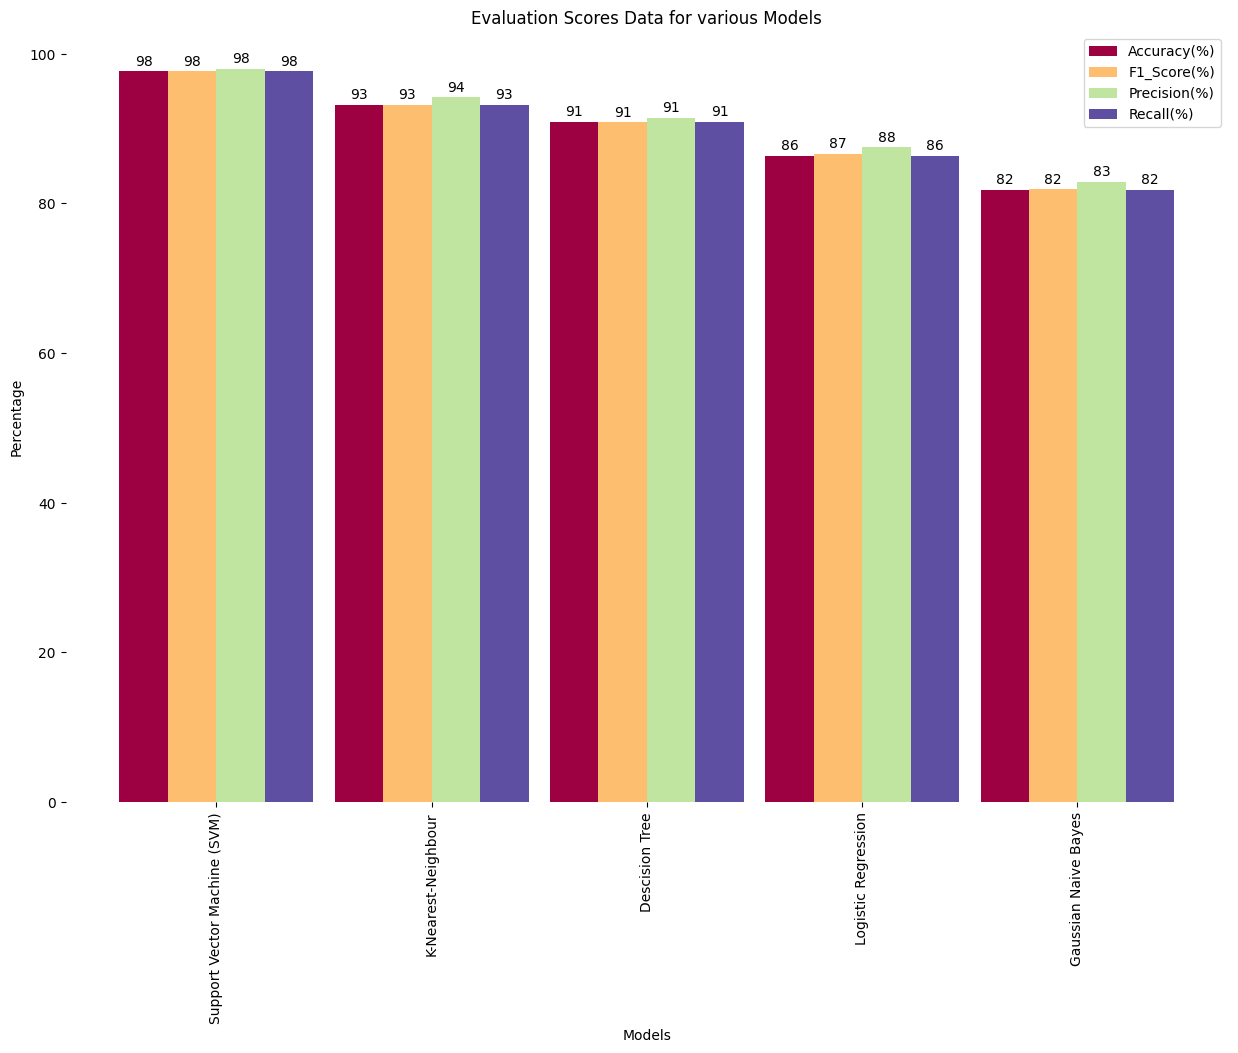

In [1108]:
splot=final_result.plot(x='Model', y=['Accuracy(%)','F1_Score(%)','Precision(%)','Recall(%)'],kind='bar',
                        figsize=(15,10),cmap='Spectral',width=0.9)
for p in splot.patches:
    splot.annotate(format(round(p.get_height()), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0,7),
                   textcoords='offset points')
plt.title('Evaluation Scores Data for various Models')
plt.ylabel('Percentage')
plt.xlabel('Models')
plt.legend(loc='upper right')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

In [1109]:
# splot.figure.savefig("output_result")

<AxesSubplot:xlabel='Model', ylabel='Accuracy(%)'>

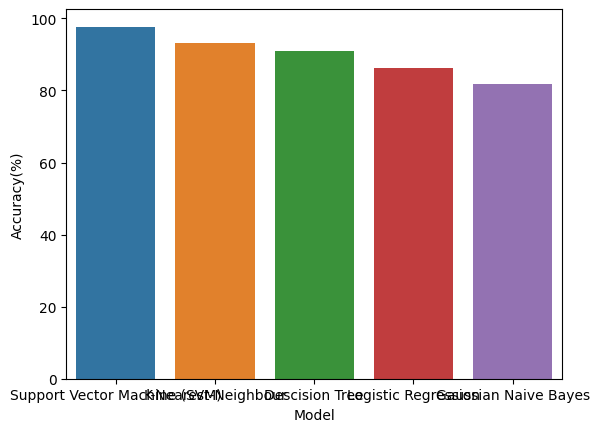

In [1110]:
sns.barplot(data=final_result,x="Model",y="Accuracy(%)")

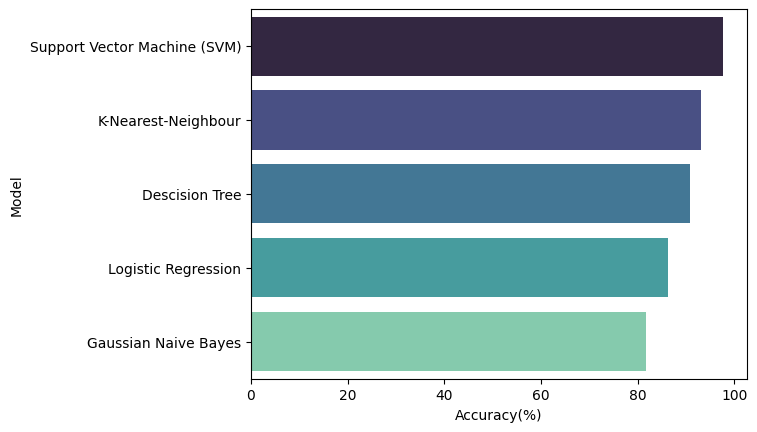

In [1111]:
cr = sns.barplot(data=final_result, x="Accuracy(%)", y="Model",palette='mako')

In [1112]:
# cr.figure.savefig("output_comp")

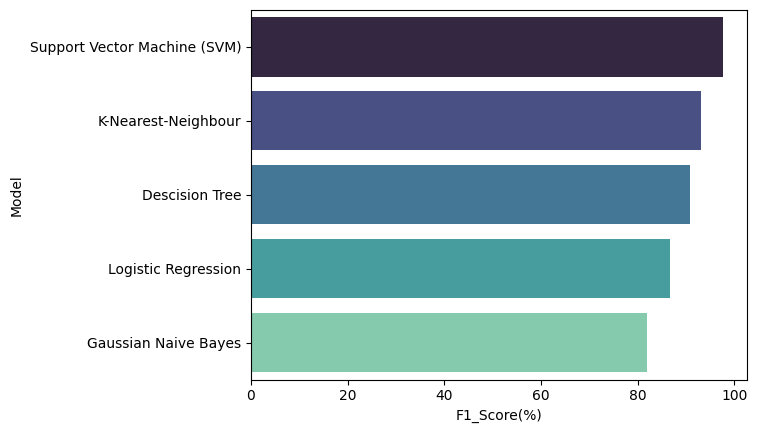

In [1113]:
cf = sns.barplot(data=final_result, x="F1_Score(%)", y="Model",palette='mako')

In [1114]:
# cr.figure.savefig("output_fscore")

In [1115]:
confMat = {
            'Model' : ['K-Nearest-Neighbour', 'Support Vector Machine (SVM)','Descision Tree',
                       'Logistic Regression','Gaussian Naive Bayes'],
            'TP' : [cm0[0,0], cm1[0,0], cm2[0,0], cm3[0,0], cm4[0,0]],
            'FP' : [cm0[0,1], cm1[0,1], cm2[0,1], cm3[0,1], cm4[0,1]],
            'TN' : [cm0[1,1], cm1[1,1], cm2[1,1], cm3[1,1], cm4[1,1]],
            'FN' : [cm0[1,0], cm1[1,0], cm2[1,0], cm3[1,0], cm4[1,0]]
}

final_cm = pd.DataFrame(confMat)
final_cm

,Model,TP,FP,TN,FN
0,K-Nearest-Neighbour,10,1,13,0
1,Support Vector Machine (SVM),11,0,13,0
2,Descision Tree,10,1,12,0
3,Logistic Regression,10,1,11,0
4,Gaussian Naive Bayes,9,3,11,0


# Pickling the model for deployment

In [1116]:
import pickle

In [1117]:
pickle.dump(model_rc, open('rfmodel.pkl','wb'))

In [1118]:
pickled_model = pickle.load(open('rfmodel.pkl','rb'))

In [1119]:
pickled_model.predict(X_test)

array([4, 1, 3, 1, 4, 3, 4, 2, 3, 2, 3, 2, 1, 4, 4, 1, 2, 3, 2, 4, 2, 1,
       1, 4, 1, 4, 2, 1, 3, 4, 1, 3, 3, 2, 1, 1, 2, 3, 2, 2, 2, 4, 3, 2])